# **Análisis Exploratorio con Técnicas de Agrupamiento**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
!pip install minisom
from minisom import MiniSom

In [ ]:
data = pd.read_csv('/content/country_data.csv')

In [ ]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
x = data[features]

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# PCA para reducir la dimensionalidad
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
def plot_data(points, labels, title):
  fig = plt.figure()
  if points.shape[1] > 2:
    ax = fig.add_subplot(projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
  else:
    plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

### 1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

In [ ]:
points = data[features]

In [ ]:
_, labels = make_blobs(n_samples=len(data), n_features=len(features), centers=3, cluster_std=1.6)

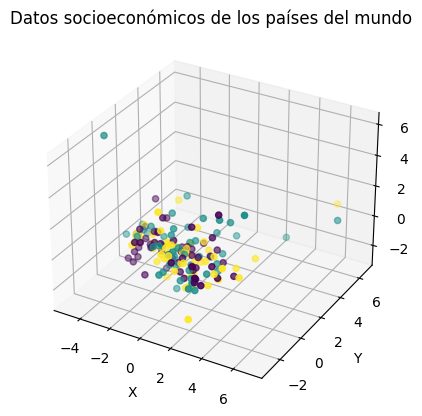

In [ ]:
plot_data(x_pca, labels, 'Datos socioeconómicos de los países del mundo')

In [ ]:
print('K-medias')
kmeans = KMeans(n_clusters=3).fit(x_pca)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
print("")
print('Labels: ', clustering_labels)
print("")
print('Centers: ', centers)

K-medias

Labels:  [2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 2 0 0 0 2 2 2 2 0 0 2 2 0 0 0 2
 2 2 0 2 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 2 0 0 2 2 2 2 2 0 0 2 2 0 2 0
 0 0 0 0 0 0 2 2 0 2 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 2 0 2 0 0 2 2 2 2 0
 0 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 2 0 2 0 0 2 1 0 0 2 2 0 0 2 0 2 0 0 0 2 2
 0 2 2 2 0 0 2 2 0 0 0 0 0 2 2 2 0 2 2]

Centers:  [[ 1.27445887 -0.38685281 -0.01485413]
 [ 5.46022462  5.43247334  0.21164795]
 [-1.85598458  0.26795887  0.01016161]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


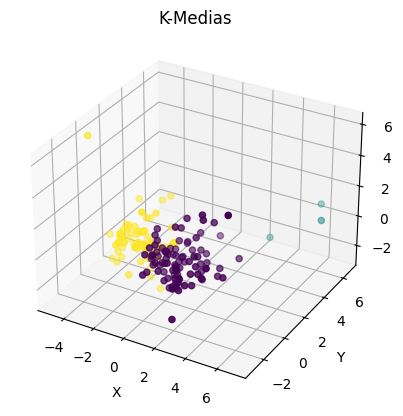

In [ ]:
plot_data(x_pca, clustering_labels, 'K-Medias')

In [ ]:
# Estimación del número óptimo de grupos
sum_of_squared_distances = []
sscore = []

ks = np.arange(2, 21)

for k in ks:
  kmeans = KMeans(n_clusters=k).fit(x_pca)
  # Elbow method
  sum_of_squared_distances.append(kmeans.inertia_)
  # Silhouette coefficient
  sscore.append(silhouette_score(x_pca, kmeans.labels_))

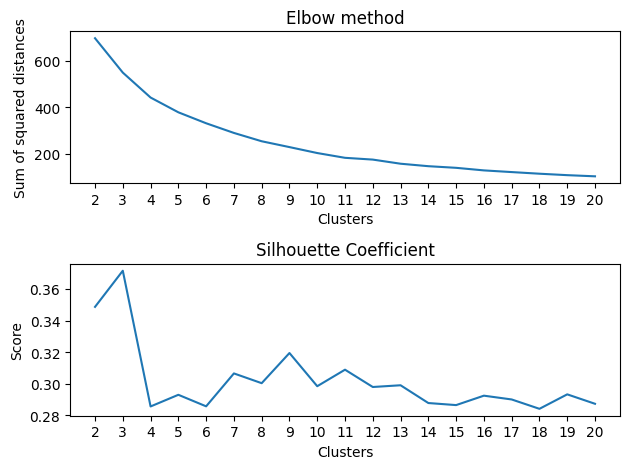

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ks, sum_of_squared_distances)
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Sum of squared distances')
axs[0].set_title('Elbow method')
axs[0].set_xticks(ks)
axs[1].plot(ks, sscore)
axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Score')
axs[1].set_title('Silhouette Coefficient')
axs[1].set_xticks(ks)
plt.tight_layout()
plt.show()

### 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

Método: Agrupamiento jerárquico

Labels:  [1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 2 0 1 1 0 0 1 2 1 0 0 0 1 0 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 2 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1]


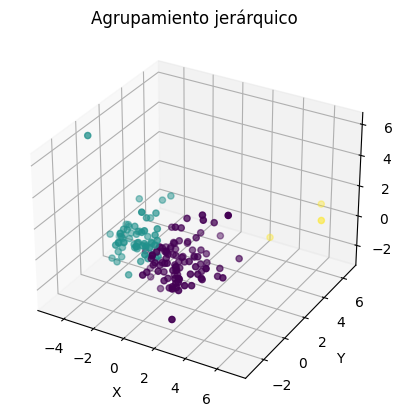

In [ ]:
agl = AgglomerativeClustering(n_clusters=3).fit(x_pca)
clustering_labels = agl.labels_
print('Labels: ', clustering_labels)
plot_data(x_pca, clustering_labels, 'Agrupamiento jerárquico')

In [ ]:
# Estimación del número óptimo de grupos
sscore = []
chscore = []

ks = np.arange(2, 21)

for k in ks:
  agl = AgglomerativeClustering(n_clusters=k).fit(x_pca)
  # Silhouette coefficient
  sscore.append(silhouette_score(x_pca, agl.labels_))
  # Calinski-Harabasz index
  chscore.append(calinski_harabasz_score(x_pca, agl.labels_))

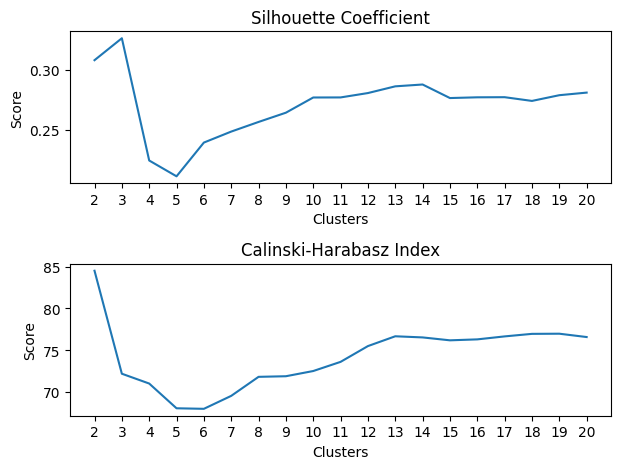

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(ks, sscore)
axs[0].set_xlabel('Clusters')
axs[0].set_ylabel('Score')
axs[0].set_title('Silhouette Coefficient')
axs[0].set_xticks(ks)
axs[1].plot(ks, chscore)
axs[1].set_xlabel('Clusters')
axs[1].set_ylabel('Score')
axs[1].set_title('Calinski-Harabasz Index')
axs[1].set_xticks(ks)
plt.tight_layout()
plt.show()

### 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

Libreria: MiniSom

In [ ]:
som = MiniSom(6, 6, 3, sigma=0.3, learning_rate=0.5)
som.random_weights_init(x_pca)
som.train(x_pca, 100)

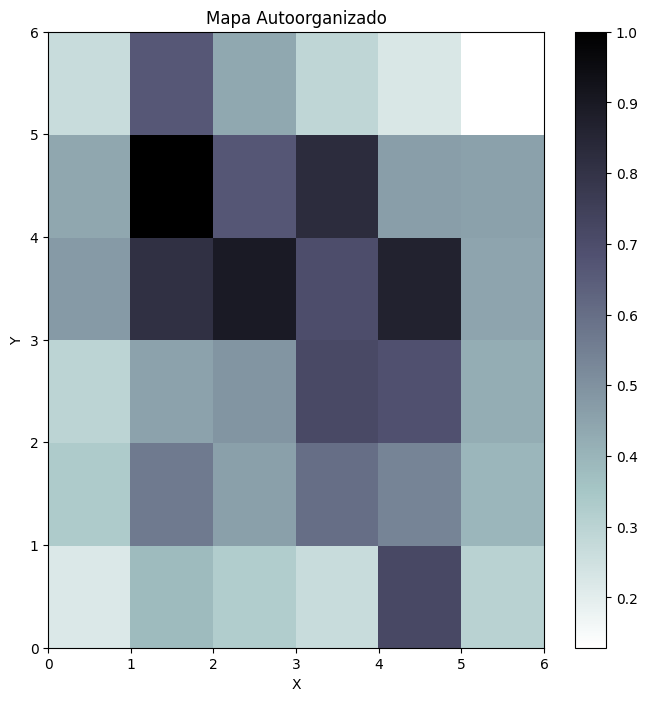

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Mapa Autoorganizado')
plt.xlabel('X')
plt.ylabel('Y')
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

### 4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

Los resultados del agrupamiento del conjunto de datos socioeconómico de los países del mundo reveló patrones interesantes. Al principio se esperaba encontrar agrupamientos basados en indicadores económicos similares, sin embargo los resultados nos sorprendieron al mostrar que la estructura de los grupos era mucho más compleja.

El análisis que se hizo demuestra que la realidad socioeconómica mundial es mucho más diversa de lo que habíamos considerado inicialmente. Los agrupamientos multidimensionales permiten comprender mejor las relaciones complejas entre los países y brindan información valiosa. Además, con esto se enfatiza la importancia de considerar múltiples dimensiones al analizar la situación socioeconómica de los países, ya que simplificaciones pueden llevar a una comprensión incompleta de la realidad.